# CORRELATION ANALYSIS
#Determining factors that highly significant to growth of Gross Revenue

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

#read in data
 
dataframe=pd.read_csv('movies.csv')
dataframe.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [33]:
##Checking for Empty Data
#dataframe.isnull().sum()
#let gets the percentage of missing value in each feature
def MsData(data):
    msData=data.isnull().sum().sort_values(ascending=False)
    msPercent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
    perctFrame=pd.concat([msData,msPercent], axis=1, keys=['Missing Total','% Missing'])
    
    return perctFrame

def chnIntt(newdata, colum):
    newdata[colum]=newdata[colum].astype('int64')
    

MsData(dataframe)

,Missing Total,% Missing
gross,189,2.464789
rating,77,1.004173
company,17,0.221701
runtime,4,0.052165
score,3,0.039124
votes,3,0.039124
writer,3,0.039124
country,3,0.039124
released,2,0.026082
star,1,0.013041


In [26]:
#checking data types

dataframe['budget']=dataframe['budget'].fillna(0)
newdata=dataframe.dropna()
MsData(newdata)
print(newdata.head())
print(newdata.dtypes)

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [34]:
#lets change gross & buget datatype
chnIntt(newdata, 'budget')
chnIntt(newdata, 'gross')
newdata.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16784\999393563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata[colum]=newdata[colum].astype('int64')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [35]:
newdata.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [52]:
#creating accurate release data.
# release data contained both date and country, we will need to seperate them,
# release date datatype is object so we need to convert it first

#convert release date
pd.options.mode.chained_assignment = None
newdata['released']=newdata['released'].astype(str)
newdata[['release_date','release_country']]=newdata['released'].str.split('(',expand=True)


In [53]:
newdata.tail(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,countrynew,release_country
7589,Batla House,Not Rated,Action,2019,"August 15, 2019 (United States)",7.2,10000.0,Nikkhil Advani,Ritesh Shah,Mrunal Thakur,India,0,13098981,Bake My Cake Films,146.0,"August 15, 2019",United States),United States)
7590,Saaho,Not Rated,Action,2019,"August 30, 2019 (United States)",5.2,17000.0,Sujeeth,Sujeeth,Prabhas,India,0,5708522,UV Creations,170.0,"August 30, 2019",United States),United States)
7591,Exit,Not Rated,Action,2019,"July 31, 2019 (South Korea)",7.0,4700.0,Sang-Geun Lee,Sang-Geun Lee,Jo Jung-Suk,South Korea,0,69501772,Filmmaker R&K,103.0,"July 31, 2019",South Korea),South Korea)
7592,Cliffs of Freedom,R,Drama,2019,"March 22, 2019 (Ireland)",6.3,417.0,Van Ling,Van Ling,Tania Raymonde,United States,0,300842,The National Hellenic Society,137.0,"March 22, 2019",Ireland),Ireland)
7593,Them That Follow,R,Drama,2019,"August 2, 2019 (United States)",5.4,2900.0,Britt Poulton,Britt Poulton,Walton Goggins,United States,0,172952,Amasia Entertainment,98.0,"August 2, 2019",United States),United States)
7594,Unplanned,R,Biography,2019,"March 29, 2019 (United States)",5.8,13000.0,Chuck Konzelman,Abby Johnson,Ashley Bratcher,United States,6000000,21354152,Unplanned Movie,109.0,"March 29, 2019",United States),United States)
7595,Student of the Year 2,Not Rated,Action,2019,"May 10, 2019 (United States)",2.2,18000.0,Punit Malhotra,Arshad Sayed,Tiger Shroff,India,0,1635907,Fox STAR Studios,146.0,"May 10, 2019",United States),United States)
7596,The Divine Fury,Not Rated,Action,2019,"July 31, 2019 (South Korea)",6.2,2500.0,Joo-hwan Kim,Joo-hwan Kim,Seo Jun Park,South Korea,0,11799556,KeyEast,129.0,"July 31, 2019",South Korea),South Korea)
7597,Luka Chuppi,Not Rated,Comedy,2019,"March 1, 2019 (India)",6.3,9000.0,Laxman Utekar,Rohan Shankar,Kartik Aaryan,India,0,14256199,Maddock Films,126.0,"March 1, 2019",India),India)
7598,De De Pyaar De,Not Rated,Comedy,2019,"May 17, 2019 (United States)",6.6,7400.0,Akiv Ali,Surabhi Bhatnagar,Ajay Devgn,India,0,1473116,Luv Films,135.0,"May 17, 2019",United States),United States)


In [56]:
newdata.drop('countrynew',axis=1, inplace=True)
newdata[['released_country','rr']]=newdata['release_country'].str.split(')',expand=True)

In [57]:
newdata

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,released_country,rr
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States),United States,
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States),United States,
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States),United States,
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States),United States,
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States),United States,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21, 2020",United States),United States,
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,"August 28, 2020",United States),United States,
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,"April 17, 2020",Mexico),Mexico,
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,"June 3, 2020",United States),United States,


In [58]:
newdata.drop('rr',axis=1, inplace=True)
newdata

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,released_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States),United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States),United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States),United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States),United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States),United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21, 2020",United States),United States
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,"August 28, 2020",United States),United States
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,"April 17, 2020",Mexico),Mexico
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,"June 3, 2020",United States),United States


In [61]:
newdata.drop(columns=['released', 'release_country'], axis=1, inplace=True)

In [65]:
newdata.sort_values(by=['gross'], inplace=False, ascending=False)
newdata

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,released_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21, 2020",United States
7652,The Eight Hundred,Not Rated,Action,2020,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,"August 28, 2020",United States
7653,The Quarry,R,Crime,2020,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,"April 17, 2020",Mexico
7656,Tulsa,PG-13,Comedy,2020,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,"June 3, 2020",United States


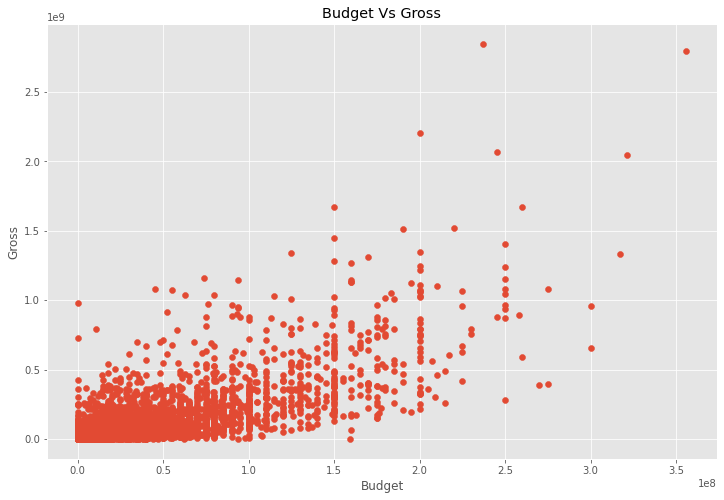

In [70]:
#check relationship between gross and budget with scarter  diagram

plt.scatter(x=newdata['budget'], y=newdata['gross'])
plt.title('Budget Vs Gross')
plt.ylabel('Gross')
plt.xlabel('Budget')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

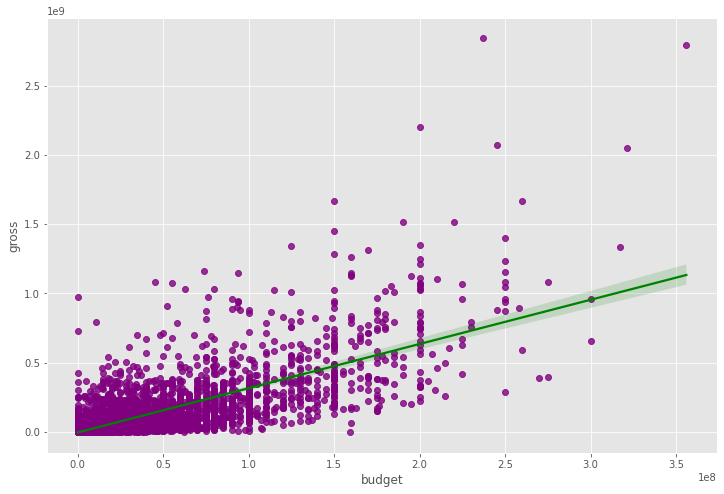

In [71]:
sns.regplot(x='budget', y='gross', data=newdata, scatter_kws={'color':'purple'}, line_kws={'color':'green'})

In [76]:
newdata.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.306915,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.053021,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.481902,0.631110,0.309945
budget,0.306915,0.053021,0.481902,1.000000,0.749330,0.269020
gross,0.258826,0.188071,0.631110,0.749330,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.269020,0.245117,1.000000


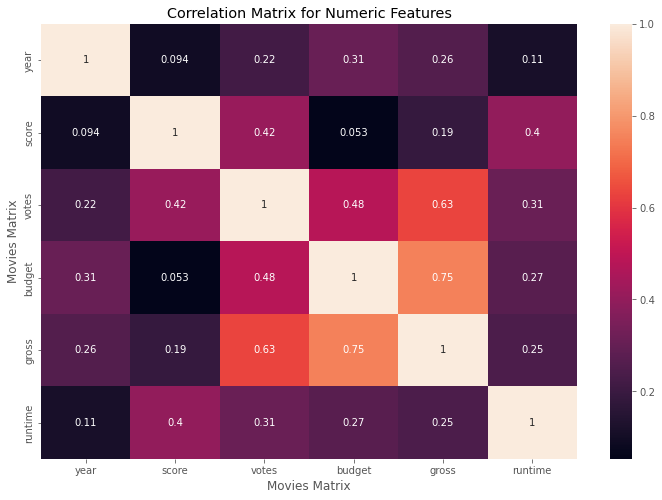

In [77]:
#visualizing the correlation betwen the data
corre=newdata.corr(method='pearson')
sns.heatmap(corre, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movies Matrix')
plt.xlabel('Movies Matrix')
plt.show()

#Budget and gross are highly Correlated follow by votes and gross

In [78]:
#converting object data type to categorical data

conData=newdata

for col_name in conData:
    if(conData[col_name].dtype=='object'):
        conData[col_name]=conData[col_name].astype('category')
        conData[col_name]=conData[col_name].cat.codes

conData

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,released_country
0,6372,6,6,1980,8.4,927000.0,2471,3851,979,52,19000000,46998772,2179,146.0,1472,54
1,5373,6,1,1980,5.8,65000.0,2169,1564,306,53,4500000,58853106,686,104.0,1276,54
2,4956,4,0,1980,8.7,1200000.0,1063,2464,1642,53,18000000,538375067,1446,124.0,1529,54
3,277,4,4,1980,7.7,221000.0,1248,1920,2112,53,3500000,83453539,1697,88.0,1276,54
4,993,6,4,1980,7.3,108000.0,1010,499,387,53,6000000,39846344,1665,98.0,1324,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,5432,4,1,2020,6.8,42000.0,438,2838,895,6,135000000,111105497,17,100.0,866,54
7652,5586,3,0,2020,6.8,3700.0,1048,1602,2645,8,80000000,461421559,350,149.0,421,54
7653,6265,6,5,2020,5.4,2400.0,2404,3726,2300,53,0,3661,1786,98.0,74,33
7656,6792,5,4,2020,5.0,294.0,2399,3719,2241,53,0,413378,1788,120.0,1627,54


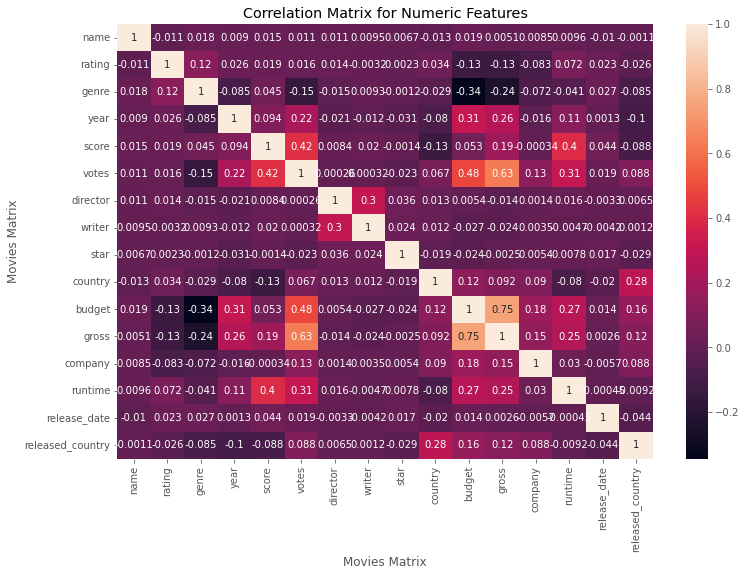

In [79]:
corre=conData.corr(method='pearson')
sns.heatmap(corre, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.ylabel('Movies Matrix')
plt.xlabel('Movies Matrix')
plt.show()

In [80]:
#let unstack the conData and sort to see the highly corrected features clearly

conData.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,released_country
name,1.000000,-0.010815,0.018363,0.008987,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.018858,0.005135,0.008529,0.009563,-0.009957,-0.001124
rating,-0.010815,1.000000,0.118600,0.025950,0.018596,0.016485,0.013653,-0.003234,0.002255,0.033607,-0.129627,-0.131786,-0.083083,0.072340,0.023219,-0.025788
genre,0.018363,0.118600,1.000000,-0.084892,0.045478,-0.148120,-0.015227,0.009340,-0.001158,-0.029208,-0.344980,-0.242597,-0.071590,-0.040939,0.026749,-0.084674
year,0.008987,0.025950,-0.084892,1.000000,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.306915,0.258826,-0.015880,0.114237,0.001252,-0.100828
score,0.014970,0.018596,0.045478,0.093951,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.053021,0.188071,-0.000342,0.397226,0.044499,-0.088449
votes,0.011462,0.016485,-0.148120,0.218941,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.481902,0.631110,0.128127,0.309945,0.019218,0.087703
director,0.010575,0.013653,-0.015227,-0.021394,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,0.005449,-0.014296,0.001379,0.015713,-0.003258,0.006476
writer,0.009451,-0.003234,0.009340,-0.011853,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.026762,-0.024021,0.003462,-0.004668,-0.004170,0.001231
star,0.006731,0.002255,-0.001158,-0.031476,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.023673,-0.002451,0.005417,0.007827,0.017419,-0.028563
country,-0.012544,0.033607,-0.029208,-0.080122,-0.126497,0.066907,0.012726,0.012415,-0.018838,1.000000,0.123439,0.091951,0.089754,-0.079525,-0.020089,0.284098


In [81]:
CorNumerized=conData.corr()
conPair=CorNumerized.unstack()
conPair

name              name                1.000000
                  rating             -0.010815
                  genre               0.018363
                  year                0.008987
                  score               0.014970
                                        ...   
released_country  gross               0.117241
                  company             0.088342
                  runtime            -0.009159
                  release_date       -0.044467
                  released_country    1.000000
Length: 256, dtype: float64

In [83]:
sorted_conPair=conPair.sort_values()
sorted_conPair.head(50)

genre             budget             -0.344980
budget            genre              -0.344980
genre             gross              -0.242597
gross             genre              -0.242597
votes             genre              -0.148120
genre             votes              -0.148120
rating            gross              -0.131786
gross             rating             -0.131786
budget            rating             -0.129627
rating            budget             -0.129627
score             country            -0.126497
country           score              -0.126497
released_country  year               -0.100828
year              released_country   -0.100828
score             released_country   -0.088449
released_country  score              -0.088449
year              genre              -0.084892
genre             year               -0.084892
                  released_country   -0.084674
released_country  genre              -0.084674
company           rating             -0.083083
rating       

In [85]:
highCor=sorted_conPair[(sorted_conPair)>0.5]
highCor

gross             votes               0.63111
votes             gross               0.63111
budget            gross               0.74933
gross             budget              0.74933
name              name                1.00000
runtime           runtime             1.00000
company           company             1.00000
gross             gross               1.00000
budget            budget              1.00000
country           country             1.00000
star              star                1.00000
writer            writer              1.00000
director          director            1.00000
votes             votes               1.00000
score             score               1.00000
year              year                1.00000
genre             genre               1.00000
rating            rating              1.00000
release_date      release_date        1.00000
released_country  released_country    1.00000
dtype: float64

In [ ]:
#Insight
#Budget and vote has the highest Correlationto Gross
# 